In [1]:
import networkx as nx
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy
from collections import deque
import seaborn as sns
import pandas as pd
from matplotlib import cm

In [2]:
lambdas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 10]
lambdasToString = [str(l) for l in lambdas]
input_file = f'./DEI.pickle'
viridis = cm.get_cmap('viridis', 12)

/scratch/4667167.1.e8/ipykernel_1971301/1814738933.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 12)


In [3]:
def project_term(x):
    # Requires definition of lambda_
    res = 0
    # project preference term
    for u in nodes:
        for p in projects:
            if (u, p) in c and (u, p) in x:
                res += c[(u, p)] * x[(u, p)]
    return res

def conflict_term(x):
    res = 0
    for e in edges:
        u, v = e
        inner_sum = 0
        for p in projects:
            if (u, p) in x and (v, p) in x:
                inner_sum += x[(u, p)] * x[(v, p)]
        res += w[(u, v)] * (1 - inner_sum)
    return res
    
def f(x):
    # Requires definition of lambda_
    return lambda_ * project_term(x) + conflict_term(x) 

In [4]:
with open(input_file, 'rb') as file:
    projects = pickle.load(file)
    capacities = pickle.load(file)
    numOfProjects = len(capacities)
    c = pickle.load(file)
    w = pickle.load(file)
    edges = pickle.load(file)
    nodes = pickle.load(file)
    wE = sum([w[e] for e in w])
    assignment = pickle.load(file)
    
G = nx.Graph()
G.add_edges_from(edges)
nodes = list(G.nodes)
n = len(nodes)
len(edges)

10166

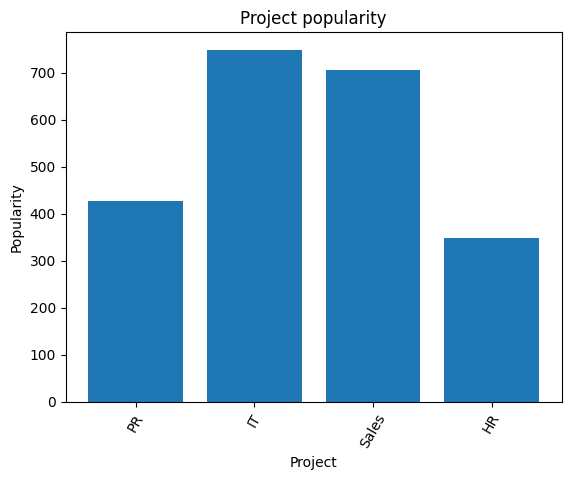

number of (conflict) edges = 10166


In [5]:
proj_popularity = dict()
for p in projects:
    proj_popularity[p] = 0
    
for u in nodes:
    for p in projects:
        if (u, p) in c:
            proj_popularity[p] += c[(u, p)]
            
xs = projects
ys = proj_popularity.values()

plt.bar(xs, ys)
plt.xlabel('Project')
plt.xticks(rotation = 60)
plt.ylabel('Popularity')
plt.title(f'Project popularity')

plt.show()

print(f'number of (conflict) edges = {len(edges)}')
# nx.draw(G, pos=nx.spring_layout(G, k=0.2, iterations=20), with_labels=True)
# plt.title(f'Conflict graph')
# plt.show()

In [6]:
settings = dict()
results = dict()
times = dict()

for l in lambdasToString:
    results_file = f'results/DEI_lambda{l}.pickle'
    with open(results_file, 'rb') as file:
        settings[l] = pickle.load(file)
        results[l] = pickle.load(file)
        times[l] = pickle.load(file)
        file.close()

In [7]:
results['0.5'].keys()

dict_keys(['quad_sol', 'rounded_sol34', 'rounded_sol12', 'random_sol', 'greedy_sol'])

In [8]:
obj_opt = dict()
obj_round12 = dict()
obj_round34 = dict()
obj_random = dict()
obj_greedy = dict()

x_round12 = dict()
x_round34 = dict()
x_opt = dict()
x_random = dict()
x_greedy = dict()

approx_ratio12 = dict()
approx_ratio34 = dict()
approx_ratio_random = dict()
approx_ratio_greedy = dict()

for i in range(len(lambdas)):
    l = lambdasToString[i]
    lambda_ = lambdas[i] * wE/ n
    res = results[l]
    
    
    x_opt[l] = res["quad_sol"]
    x_round12[l] = res["rounded_sol12"]
    x_round34[l] = res["rounded_sol34"]    
    x_random[l] = res['random_sol']
    x_greedy[l] = res["greedy_sol"]
    
    obj_opt[l] = f(x_opt[l])
    obj_round12[l] = f(x_round12[l])
    obj_round34[l] = f(x_round34[l])
    obj_random[l] = f(x_random[l])
    obj_greedy[l] = f(x_greedy[l])
    

    approx_ratio12[l] = obj_round12[l] / obj_opt[l]
    approx_ratio34[l] = obj_round34[l] / obj_opt[l]
    
    approx_ratio_random[l] = obj_random[l] / obj_opt[l]
    approx_ratio_greedy[l] = obj_greedy[l] / obj_opt[l]
    
    print(f'\n======= lambda = {lambdas[i]} ==========')   
    print(f'approx ratio (1/2 approx) = {approx_ratio12[l]}')
    print(f'approx ratio (3/4 approx) = {approx_ratio34[l]}')
    print(f'approx ratio (greedy) = {approx_ratio_greedy[l]}')
    print(f'approx ratio (random) = {approx_ratio_random[l]}')
    


======= lambda = 0 ==========
approx ratio (1/2 approx) = 0.7770596080845388
approx ratio (3/4 approx) = 0.7814712219144352
approx ratio (greedy) = 0.8895044629116651
approx ratio (random) = 0.7639273622653124

======= lambda = 0.1 ==========
approx ratio (1/2 approx) = 0.8030801457951858
approx ratio (3/4 approx) = 0.7953798426007276
approx ratio (greedy) = 0.9417122046771604
approx ratio (random) = 0.7437596774784735

======= lambda = 0.2 ==========
approx ratio (1/2 approx) = 0.8146556251714474
approx ratio (3/4 approx) = 0.8062294765859811
approx ratio (greedy) = 0.9438948865448011
approx ratio (random) = 0.7332133089709448

======= lambda = 0.3 ==========
approx ratio (1/2 approx) = 0.8271855307873459
approx ratio (3/4 approx) = 0.816896232468085
approx ratio (greedy) = 0.9449289663704541
approx ratio (random) = 0.7229292641411377

======= lambda = 0.4 ==========
approx ratio (1/2 approx) = 0.8411285486374742
approx ratio (3/4 approx) = 0.8387549647263265
approx ratio (greedy) = 

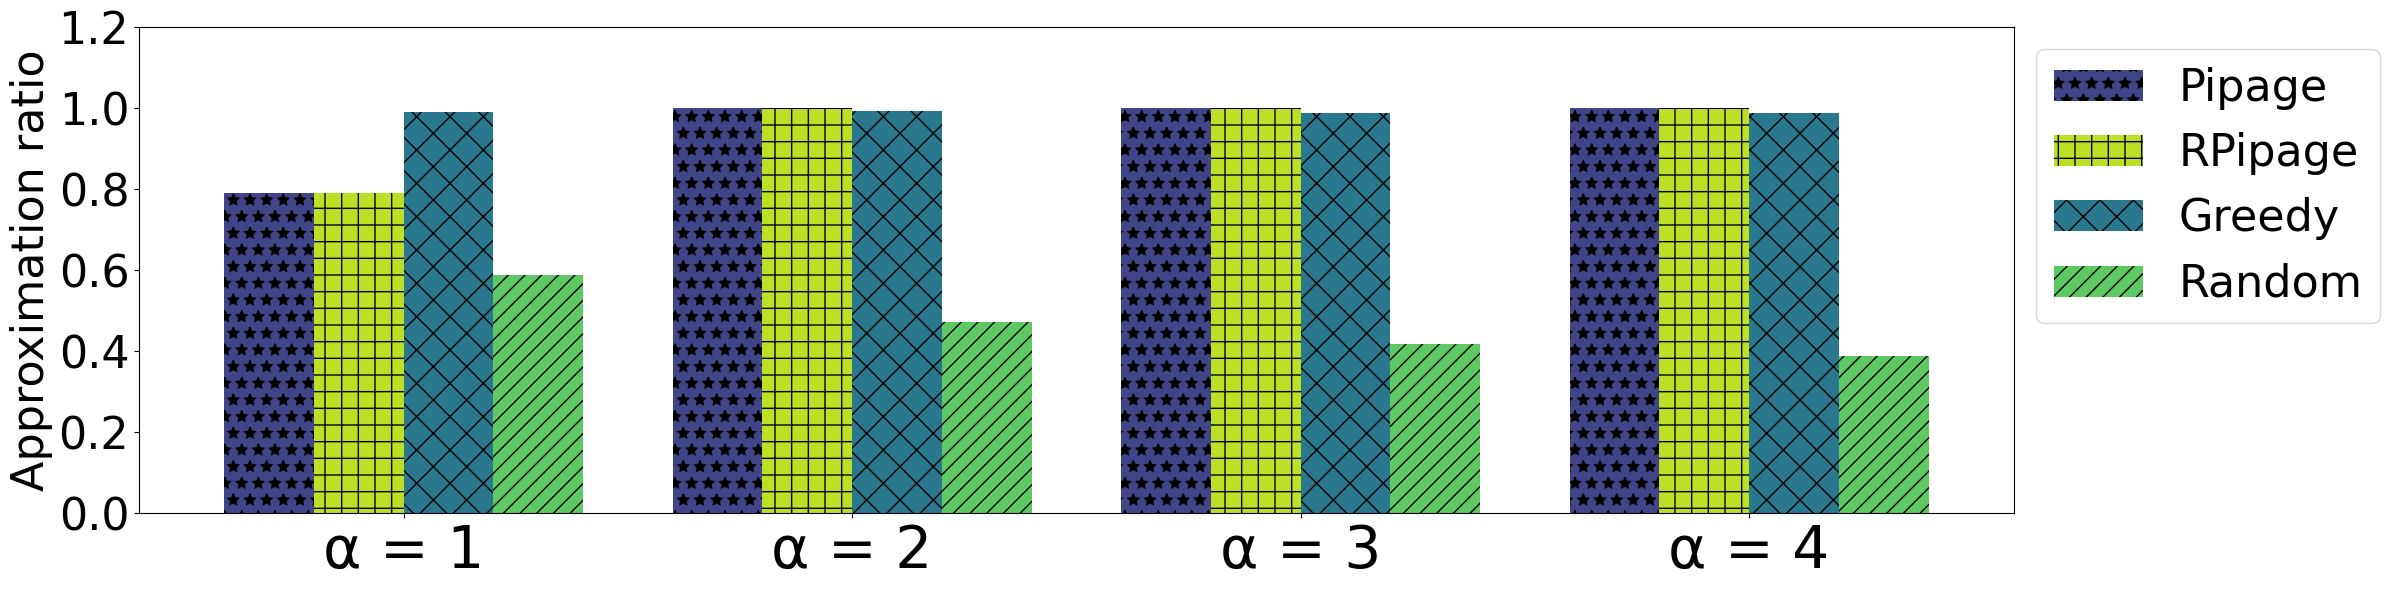

In [9]:
def barPlots(specDict, showTitle=False):
    plt.figure(figsize=specDict['plotSize'])
#     plt.rc('xtick', labelsize=30) # fontsize of the tick labels
#     plt.rc('ytick', labelsize=30) # fontsize of the tick labels
#     plt.rc('legend', fontsize=26)
    plt.ylim([0, 1.2])
    barWidth = 0.2

    my_cmap = plt.get_cmap("viridis")

    #Specify X-axis
    X_axis = np.arange(len(specDict['datasetNames']))
    plt.bar(X_axis - 0.3, specDict['Pipage'], barWidth, label='Pipage', color=my_cmap(0.2), hatch='*')
    plt.bar(X_axis - 0.1, specDict['RandPipage'], barWidth, label='RPipage', color=my_cmap(0.9), hatch='+')
    plt.bar(X_axis + 0.1, specDict['Greedy'], barWidth, label='Greedy', color=my_cmap(0.4), hatch='x')
    plt.bar(X_axis + 0.3, specDict['Random'], barWidth, label='Random', color=my_cmap(0.75), hatch='//')

    if showTitle:
        title_text = specDict['plotTitle']
        plt.title(title_text, fontsize=specDict['titleFontSize'])

#     plt.yscale("log")
    plt.xticks(X_axis, specDict['datasetNames'])
    plt.xlabel(specDict['xlab'], fontsize=specDict['axisFontSize'])
    plt.ylabel(specDict['ylab'], fontsize=specDict['axisFontSize']) 
    plt.legend(loc='best', fontsize=32, bbox_to_anchor=(1, 1))

    plt.xticks(fontsize=42)
    plt.yticks(fontsize=32)
#     ax = plt.gca()
#     ax.tick_params(axis='x', labelrotation = 45)
    plt.tight_layout()
    plt.savefig(specDict['saveFileName'], pad_inches=1)
    plt.show()

#Specify dictionary for plotting for all Datasets
barPlot_Diversity = {
    'datasetNames': ['α = 1', 'α = 2', 'α = 3', 'α = 4'], 
    'plotSize': (24, 6), 
    'barColors': ['teal', 'steelblue', 'slateblue', 'mediumpurple'],
    'Pipage': [approx_ratio12[l] for l in ['1', '2', '3', '4']], 
    'RandPipage': [approx_ratio34[l] for l in ['1', '2', '3', '4']],
    'Greedy': [approx_ratio_greedy[l] for l in ['1', '2', '3', '4']], 
    'Random': [approx_ratio_random[l] for l in ['1', '2', '3', '4']],
    'xlab': '', 
    'ylab': 'Approximation ratio' ,
    'plotTitle': '', 
    'axisFontSize': 32, 
    'titleFontSize': 14,
    'saveFileName': './figs/diversityCompRatios.pdf'
}
barPlots(barPlot_Diversity)

In [10]:
print(f'w(E) = {wE}')
for l, lstr in zip(lambdas, lambdasToString):
    lambda_ = l * wE / n
    projectsVal = project_term(x_round34[lstr])
    print(f'\n===== lambda = {l} ======')
    print(f'projects term value = {projectsVal}')
    print(f'a = {projectsVal - wE}')

w(E) = 10166

===== lambda = 0 ======
projects term value = 1043
a = -9123

===== lambda = 0.1 ======
projects term value = 1133
a = -9033

===== lambda = 0.2 ======
projects term value = 1131
a = -9035

===== lambda = 0.3 ======
projects term value = 1151
a = -9015

===== lambda = 0.4 ======
projects term value = 1198
a = -8968

===== lambda = 0.5 ======
projects term value = 1264
a = -8902

===== lambda = 0.6 ======
projects term value = 1293
a = -8873

===== lambda = 0.7 ======
projects term value = 1287
a = -8879

===== lambda = 0.8 ======
projects term value = 1158
a = -9008

===== lambda = 0.9 ======
projects term value = 1149
a = -9017

===== lambda = 1 ======
projects term value = 1184
a = -8982

===== lambda = 2 ======
projects term value = 1978
a = -8188

===== lambda = 3 ======
projects term value = 2037
a = -8129

===== lambda = 4 ======
projects term value = 2041
a = -8125

===== lambda = 5 ======
projects term value = 2041
a = -8125

===== lambda = 10 ======
projects term

### Diversity analysis (fixed $\lambda$)

In [11]:
dfs = dict()
dfs_merged = dict()
for l in lambdasToString:
    x = x_opt[l]
    divisions = deque()
    ids = deque()
    for k, v in x.items():
        if v == 1:
            ids.append(k[0])
            divisions.append(k[1])

    data = zip(ids, divisions)
    df_sol = pd.DataFrame(data, columns=['Id', 'Division'])
    dfs[l] = df_sol

In [12]:
df_old = pd.read_csv('DEI.csv')
# df_old = df[['Id', 'Division', 'Gender']]
df_old['Division'].unique()

array(['PR', 'IT', 'Sales', 'HR'], dtype=object)

In [13]:
for l in lambdasToString:
    dfs_merged[l] = pd.merge(dfs[l], df_old, on="Id")

In [14]:
def calc_percentage(l, department, setting='new'):
    df_merged = dfs_merged[l]
    if setting == 'new':
        IT_df = df_merged[df_merged['Division_x'] == department]
    else:
        IT_df = df_merged[df_merged['Division_y'] == department]
    IT_total = len(IT_df)
    IT_male = IT_df[IT_df['Gender'] == 'Male']
    IT_female = IT_df[IT_df['Gender'] == 'Female']
    values = [len(v) for v in [IT_male, IT_female]]
    return values



Plots for lambda = 0


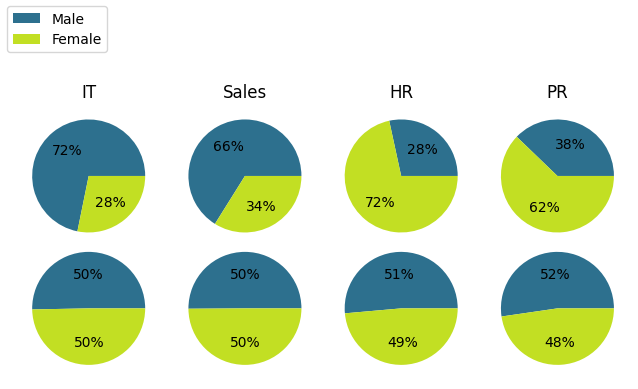

Plots for lambda = 0.1


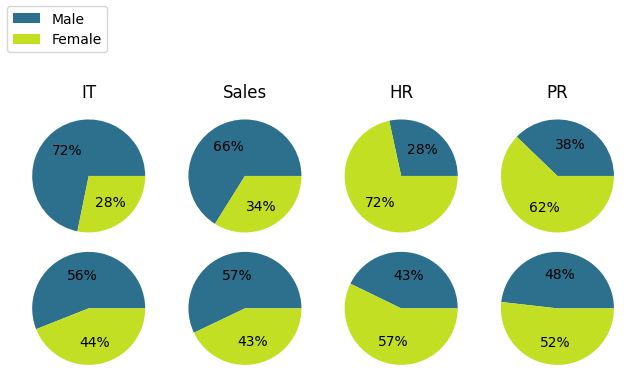

Plots for lambda = 0.2


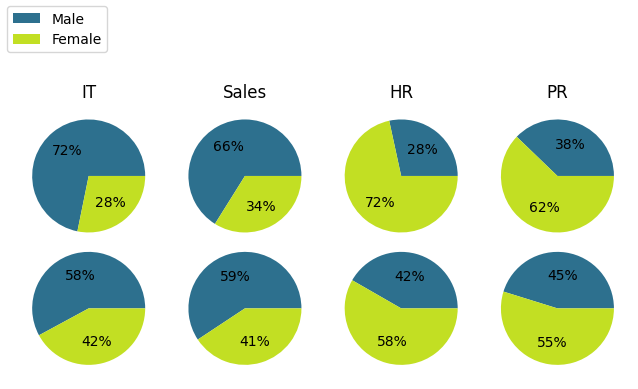

Plots for lambda = 0.3


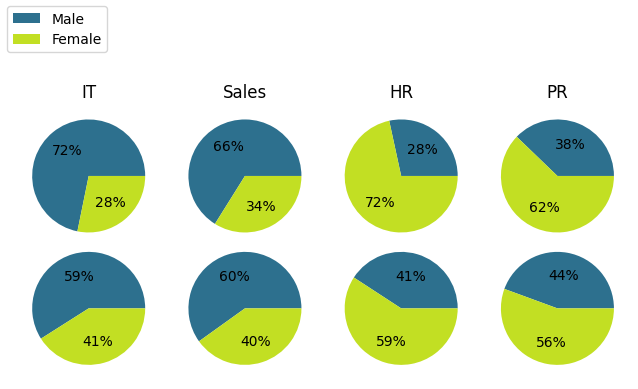

Plots for lambda = 0.4


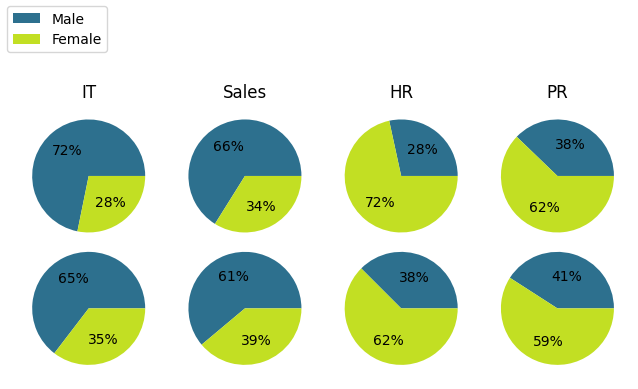

Plots for lambda = 0.5


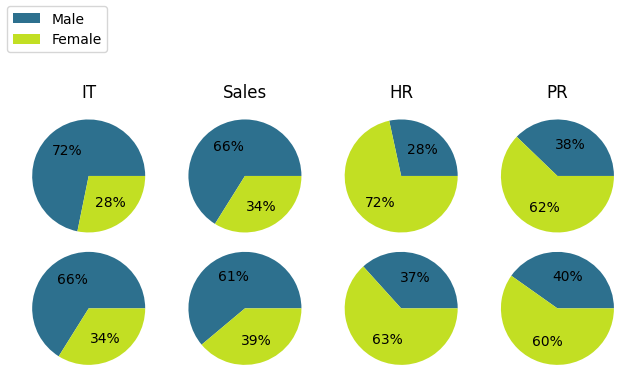

Plots for lambda = 0.6


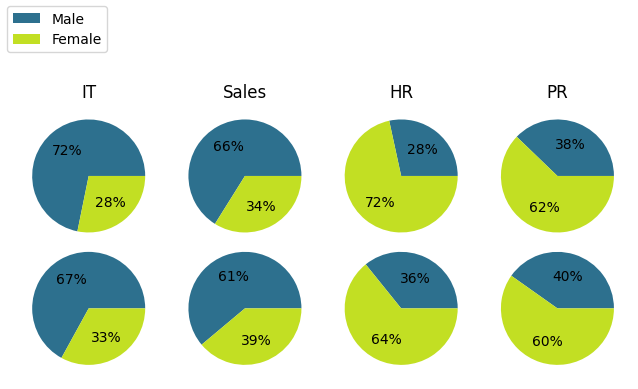

Plots for lambda = 0.7


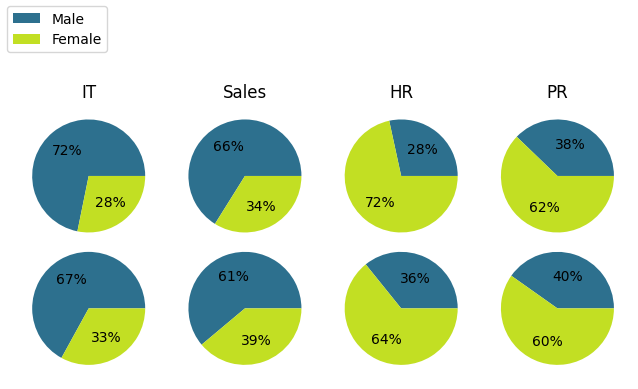

Plots for lambda = 0.8


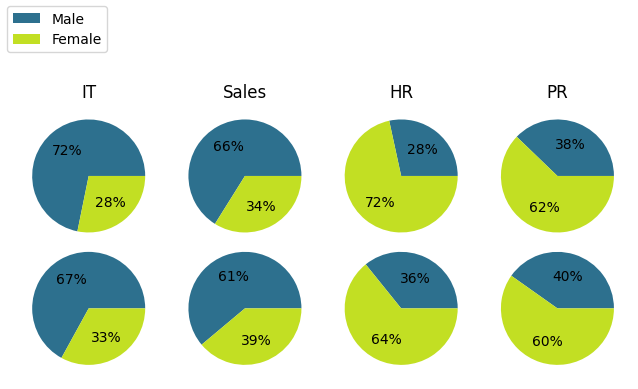

Plots for lambda = 0.9


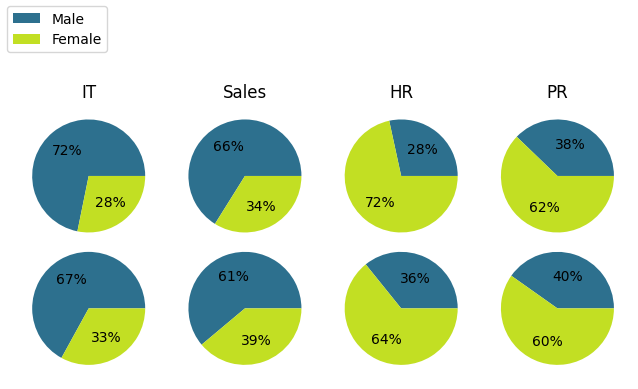

Plots for lambda = 1


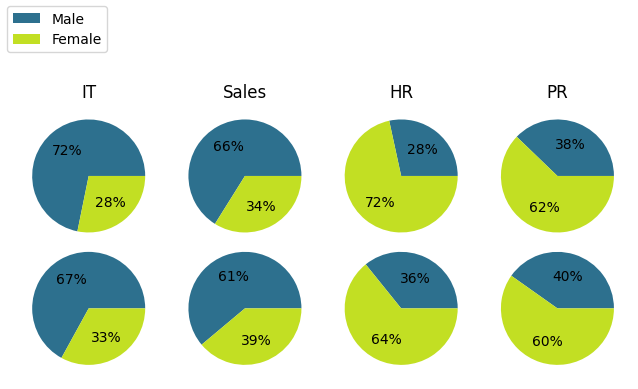

Plots for lambda = 2


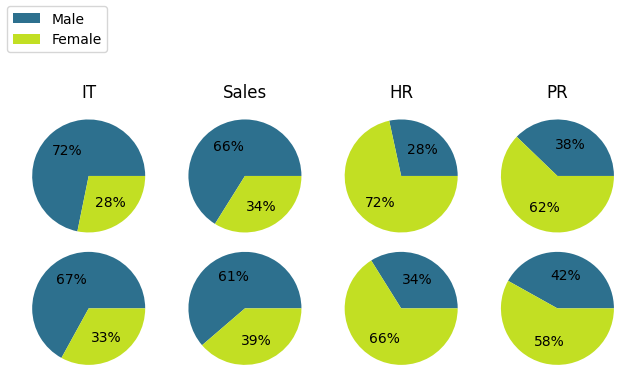

Plots for lambda = 3


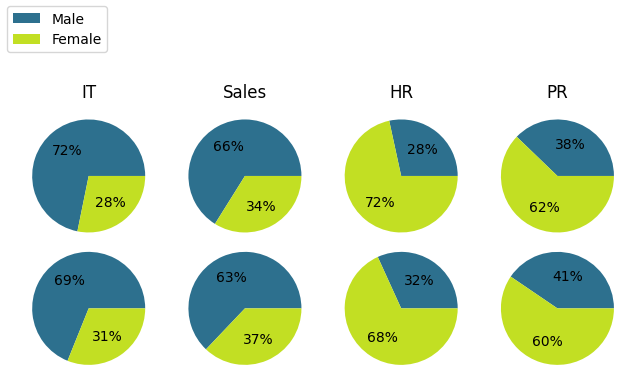

Plots for lambda = 4


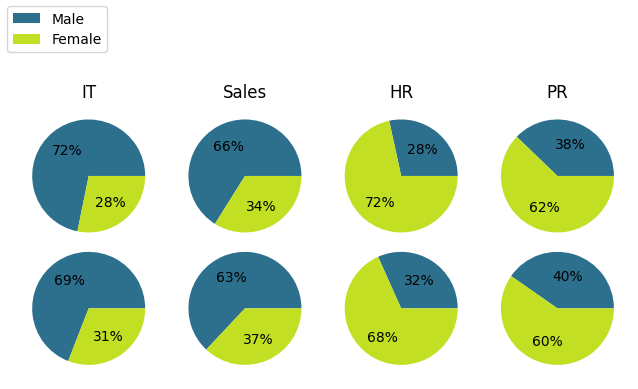

Plots for lambda = 5


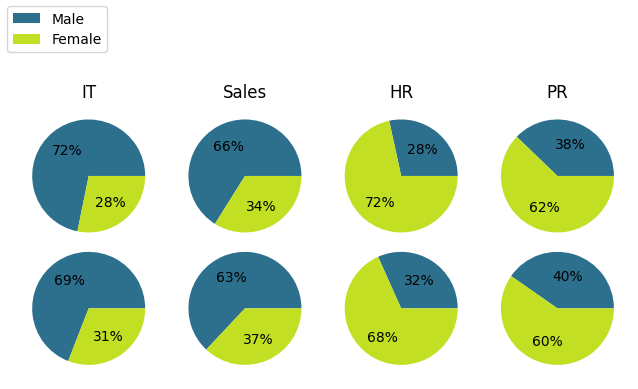

Plots for lambda = 10


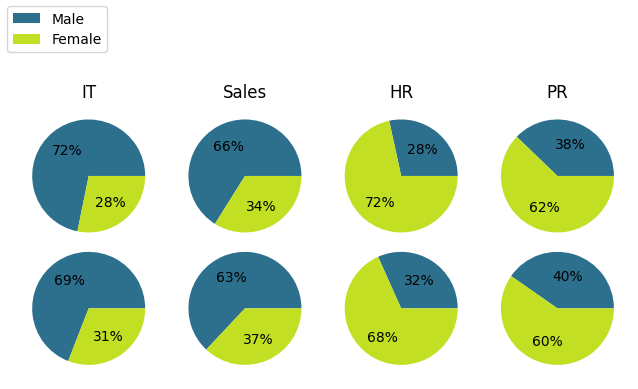

In [15]:
for l in lambdasToString:
    colors = [viridis(0.4), viridis(0.9)]
    print(f'Plots for lambda = {l}')
    IT_new, IT_old = calc_percentage(l, 'IT'), calc_percentage(l, 'IT', 'old')
    HR_new, HR_old = calc_percentage(l, 'HR'), calc_percentage(l, 'HR', 'old')
    PR_new, PR_old = calc_percentage(l, 'PR'), calc_percentage(l, 'PR', 'old')
    Sales_new, Sales_old = calc_percentage(l, 'Sales'), calc_percentage(l, 'Sales', 'old')
    keys = ['Male', 'Female']

    fig, axs = plt.subplots(2, 4)
    fig.subplots_adjust(hspace=-0.8)

    axs[0, 0].pie(IT_old, autopct='%1.0f%%', normalize=True, colors=colors)
    axs[0, 0].set_title('IT')
    axs[1, 0].pie(IT_new, autopct='%1.0f%%', normalize=True, colors=colors)

    axs[0, 1].pie(Sales_old, autopct='%1.0f%%', normalize=True, colors=colors)
    axs[0, 1].set_title('Sales')
    axs[1, 1].pie(Sales_new, autopct='%1.0f%%', normalize=True, colors=colors)

    axs[0, 2].pie(HR_old, autopct='%1.0f%%', normalize=True, colors=colors)
    axs[0, 2].set_title('HR')
    axs[1, 2].pie(HR_new, autopct='%1.0f%%', normalize=True, colors=colors)

    axs[0, 3].pie(PR_old, autopct='%1.0f%%', normalize=True, colors=colors)
    axs[0, 3].set_title('PR')
    axs[1, 3].pie(PR_new, autopct='%1.0f%%', normalize=True, colors=colors)

    common_legend = fig.legend(keys, loc='upper left')

    plt.tight_layout()
    plt.savefig(f'./figs/diversity_before_after_{l}.pdf', bbox_inches='tight')
    plt.show()

In [16]:
changed_dep = dict()
for l in lambdasToString:
    df_merged = dfs_merged[l]
    df_stayed = df_merged[df_merged['Division_x'] == df_merged['Division_y']]
    print(f'lambda = {l} - Percentage of people who changed department = {1 - len(df_stayed) / 4000}')
    changed_dep[l] = 1 - len(df_stayed) / 4000

lambda = 0 - Percentage of people who changed department = 0.7615000000000001
lambda = 0.1 - Percentage of people who changed department = 0.35775
lambda = 0.2 - Percentage of people who changed department = 0.32325000000000004
lambda = 0.3 - Percentage of people who changed department = 0.3085
lambda = 0.4 - Percentage of people who changed department = 0.24775000000000003
lambda = 0.5 - Percentage of people who changed department = 0.21924999999999994
lambda = 0.6 - Percentage of people who changed department = 0.1985
lambda = 0.7 - Percentage of people who changed department = 0.18799999999999994
lambda = 0.8 - Percentage of people who changed department = 0.16474999999999995
lambda = 0.9 - Percentage of people who changed department = 0.15475000000000005
lambda = 1 - Percentage of people who changed department = 0.13149999999999995
lambda = 2 - Percentage of people who changed department = 0.07574999999999998
lambda = 3 - Percentage of people who changed department = 0.054250000000

In [17]:
avg_gaps = dict()
for l in lambdasToString:
    avg = 0
    for d in projects:
        vals = calc_percentage(l, d)
        avg += np.abs(vals[0] - vals[1]) / 1000
    avg_gaps[l] = avg / 4

In [18]:
# gap in the original dataset
avg = 0
for d in projects:
        vals = calc_percentage(l, d, 'old')
        avg += np.abs(vals[0] - vals[1]) / 1000
avg /= 4
avg

0.3585

In [19]:
for l in lambdasToString:
    print(f'{l} & {np.round(changed_dep[l], 2)} & {np.round(avg_gaps[l], 2)} \\\\')

0 & 0.76 & 0.02 \\
0.1 & 0.36 & 0.11 \\
0.2 & 0.32 & 0.15 \\
0.3 & 0.31 & 0.17 \\
0.4 & 0.25 & 0.24 \\
0.5 & 0.22 & 0.25 \\
0.6 & 0.2 & 0.26 \\
0.7 & 0.19 & 0.26 \\
0.8 & 0.16 & 0.26 \\
0.9 & 0.15 & 0.26 \\
1 & 0.13 & 0.26 \\
2 & 0.08 & 0.26 \\
3 & 0.05 & 0.3 \\
4 & 0.05 & 0.3 \\
5 & 0.05 & 0.3 \\
10 & 0.05 & 0.3 \\


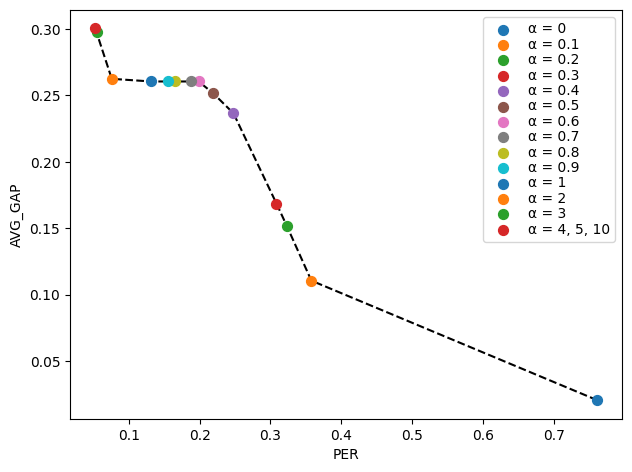

In [20]:
xs = [changed_dep[l] for l in lambdasToString]
ys = [avg_gaps[l] for l in lambdasToString]

data_dict = {}
for i in range(len(lambdas)):
    xy_pair = (xs[i], ys[i])
    if xy_pair not in data_dict:
        data_dict[xy_pair] = []
    data_dict[xy_pair].append(lambdas[i])

# Create a scatter plot and label points with lambda values
for xy_pair, ls in data_dict.items():
    x, y = xy_pair
    if len(ls) > 3:
        label = 'α = ' + f'{ls[0]} - {ls[-1]}'
    else:
        label = 'α = ' + ', '.join([f"{l}" for l in ls])
    plt.scatter(x, y, label=label, s=50, zorder=2)
    
plt.plot(xs, ys, linestyle='--', marker='', color='black', zorder=1)
plt.xlabel('PER')
plt.ylabel('AVG_GAP')
plt.tight_layout(pad=1)
plt.legend(loc='best', labelspacing=0.1)
plt.savefig('./figs/hyperparameter_diversity.pdf', bbox_inches='tight')

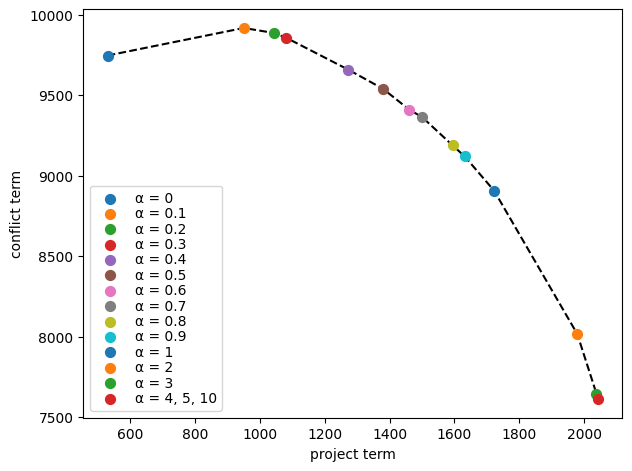

In [21]:
ys = np.array([np.round(conflict_term(x_opt[l]), 2) for l in lambdasToString])
xs = np.array([np.round(project_term(x_opt[l]), 2) for l in lambdasToString])

data_dict = {}
for i in range(len(lambdas)):
    xy_pair = (xs[i], ys[i])
    if xy_pair not in data_dict:
        data_dict[xy_pair] = []
    data_dict[xy_pair].append(lambdas[i])

# Create a scatter plot and label points with lambda values
for xy_pair, ls in data_dict.items():
    x, y = xy_pair
    if len(ls) > 3:
        label = 'α = ' + f'{ls[0]} - {ls[-1]}'
    else:
        label = 'α = ' + ', '.join([f"{l}" for l in ls])
    plt.scatter(x, y, label=label, s=50, zorder=2)
    
plt.plot(xs, ys, linestyle='--', marker='', color='black', zorder=1)
plt.xlabel('project term')
plt.ylabel('conflict term')
plt.tight_layout(pad=1)
plt.legend(loc='best', labelspacing=0.1)
plt.savefig('./figs/hyperparameter_diversity_objective.pdf', bbox_inches='tight')